In [3]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

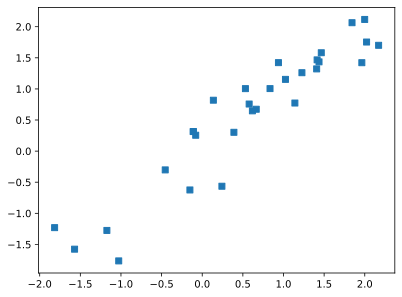

In [12]:
# create data
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [13]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer, 1: number of input, 1: number of output
    nn.ReLU(), # activation function
    nn.Linear(1,1) # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [14]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [16]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

# train the model
for epochi in range(numepochs):
  # forward pass
  yHat = ANNreg(x)

  #compute loss
  loss = lossfun(yHat, y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad() # re-initialize the gradients to set all of the derivatives to zero
  loss.backward()
  optimizer.step()

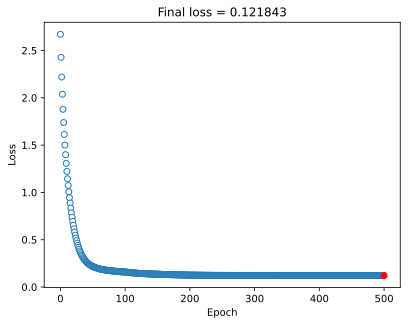

In [17]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [24]:
# testloss -> tensor(0.1218, grad_fn=<MeanBackward0>)
# testloss.detach() -> tensor(0.1218)
testloss.item()

0.12184341251850128

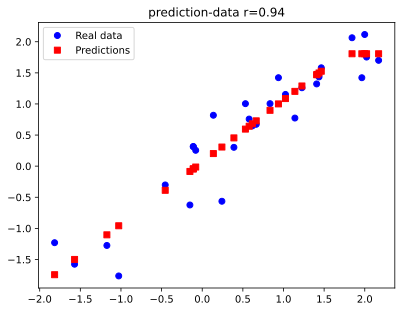

In [20]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}') # correlation data
plt.legend()
plt.show()